In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Data Prep

In [2]:
#Load CSV
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter for currencies currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Remove rows with null values
crypto_df = crypto_df.dropna()
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [5]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [6]:
# Delete the CoinName from the dataframe
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
# Convert Algorithm and ProofType
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,True,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,True,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Examine the number of rows and columns of your dataset now. How did they change?***

The number of columns increased from 6 to 100, creating a column for each type.

In [9]:
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

# Dimensionality Reduction

In [17]:
# Apply PCA
pca = PCA(n_components=.9)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         3.58456737e-16, -4.80911939e-17,  4.58337826e-17],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.07053846e-14,  5.48821903e-15,  8.98502580e-15],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -1.13626647e-13, -3.26257767e-14,  5.44567520e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.68528949e-16,  6.94015684e-16, -1.95362561e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -2.18756881e-15, -3.07411562e-16,  1.28610587e-15]])

In [19]:
# Transform to DataFrame
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.904363e-25,-0.000000e+00,2.057510e-26,-0.007129,-1.319756,-0.051813,...,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.318434,1.032331,-0.591126,0.001386,2.319939e-16,-1.705988e-16,-9.671889e-17,-0.007739,-1.322514,-0.056674,...,-3.602201e-16,1.344421e-16,4.022422e-16,-2.745809e-16,3.803523e-16,-3.102422e-16,4.142115e-17,3.584567e-16,-4.809119e-17,4.583378e-17
2,2.305468,1.656383,-0.683617,0.004731,1.270518e-14,3.484802e-14,5.478288e-14,-0.054781,-1.542879,-0.943951,...,-4.171318e-14,9.362003e-15,-2.191244e-14,-2.201814e-14,-2.093177e-15,-2.891521e-14,3.094677e-14,2.070538e-14,5.488219e-15,8.985026e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.382084e-15,-7.089685e-15,-1.208913e-14,-0.002071,0.281463,0.251862,...,-1.024479e-14,-2.640544e-15,-5.286680e-15,-1.607594e-14,-1.387143e-14,8.839171e-16,-6.859264e-16,-3.183565e-15,4.028104e-15,-1.564607e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-2.893526e-15,-1.077402e-14,-2.102780e-14,0.027735,0.519099,0.188820,...,-7.119352e-14,-6.273496e-14,-3.974277e-14,-1.155848e-15,-1.601661e-13,9.915110e-15,-9.980405e-14,1.982363e-14,6.344144e-14,6.368293e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,3.167561e-14,5.195698e-14,8.467478e-14,-0.851713,2.041159,3.560713,...,-1.470577e-14,-6.101624e-15,-3.884786e-15,-1.944624e-14,-1.609576e-14,2.968048e-15,-2.768667e-15,-3.199370e-15,7.248570e-15,-9.277103e-16
528,-0.333144,1.032071,-0.590740,0.001399,7.701296e-17,1.031431e-17,6.991451e-17,-0.007154,-1.320125,-0.052460,...,9.465098e-17,8.807820e-18,2.082762e-16,1.041709e-16,5.729486e-17,2.471985e-17,1.911644e-17,6.140261e-17,-1.028609e-17,5.319680e-17
529,0.324349,-2.312308,0.421515,-0.001319,-2.384931e-15,-5.791947e-15,-9.898637e-15,0.017309,0.161077,-0.047787,...,-1.217029e-13,5.594272e-14,-1.750781e-13,-1.992424e-13,-1.626672e-13,-9.962648e-14,-1.953332e-13,-1.136266e-13,-3.262578e-14,5.445675e-14
530,-0.149364,-2.049336,0.412968,-0.001745,-4.797850e-15,-1.321564e-14,-1.803268e-14,0.028954,0.544389,0.233373,...,1.732601e-15,-1.746907e-15,-6.557965e-16,5.124311e-16,-2.596698e-15,-2.645390e-15,4.397833e-17,3.685289e-16,6.940157e-16,-1.953626e-15


**How did it change?**
The number of columns reduced from 99 to 74.

In [20]:
# Explained Variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [22]:
# Initialize t-SNE
tsne = TSNE(learning_rate=35)

In [24]:
# Reduce dimensionsa and check that dimensions have been reduced to two
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(532, 2)

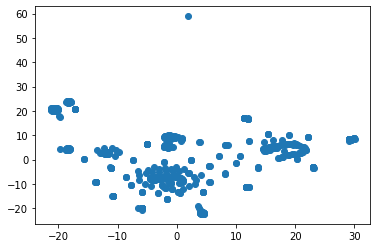

In [25]:
# First column & Second column
x = tsne_features[:,0]

y = tsne_features[:,1]

# Plot the results
plt.scatter(x, y)
plt.show()

# Cluster Analysis with k-Means

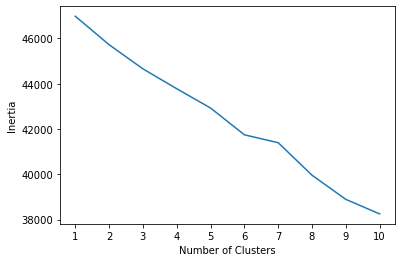

In [27]:
inertia = []
k = list(range(1, 11))

# Use a for-loop to determine the inertia for each k between 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Create an elbow plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**Recommendation**

The best k value appears to be 6. An output of 6 clusters would be best to categorize the crytocurrencies.